In [1]:
!pip install pandas psycopg2-binary sqlalchemy matplotlib

In [2]:
import pandas as pd
import psycopg2 as db
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import os

In [3]:
db_type = 'postgresql'
host = 'database'
port = 5432
db_name = os.environ.get('POSTGRES_DB')
user = os.environ.get('POSTGRES_USER')
password = os.environ.get('POSTGRES_PASSWORD')

conn_uri = f"{db_type}://{user}:{password}@{host}:{port}/{db_name}"
alchemyEngine = create_engine(conn_uri)
db_conn = alchemyEngine.connect();

In [26]:
""" Playgound"""
db_conn = alchemyEngine.connect();
query = """
    SELECT event_type, COUNT(*)
    FROM customers
    GROUP BY event_type
"""
df = pd.read_sql(query, db_conn)
# print(df.describe())
df.head()

,event_type,count
0,cart,5482848
1,purchase,1285952
2,remove_from_cart,2746062
3,view,9626231


In [21]:
""" Show Stat """
db_conn = alchemyEngine.connect();
query = """
    SELECT price
    FROM customers
    WHERE event_type = 'purchase'
"""
df = pd.read_sql(query, db_conn)
print(df.describe())

              price
count  1.285952e+06
mean   4.933093e+00
std    8.927367e+00
min   -7.937000e+01
25%    1.590000e+00
50%    3.000000e+00
75%    5.400000e+00
max    3.277800e+02


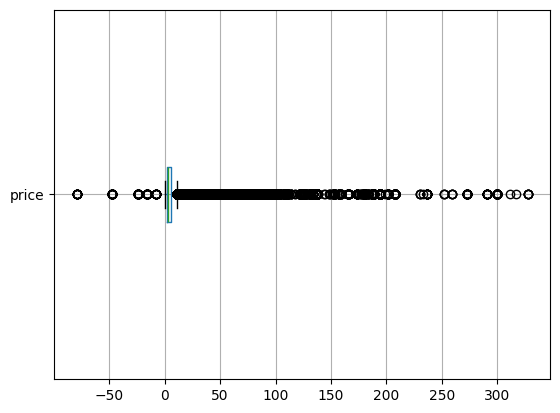

In [24]:
""" Box Plot """
db_conn = alchemyEngine.connect();
query = """
    SELECT event_time, price
    FROM customers
    WHERE event_type = 'purchase'
"""
df = pd.read_sql(query, db_conn)
ax = df.boxplot(column='price', vert=False)
plt.show()